In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
from textblob import TextBlob
import re
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df = pd.read_csv('customerC.csv',encoding="utf8")
df.drop('Unnamed: 0', axis=1, inplace=True)


In [77]:

df["comments"] = df['comments'].str.replace('[^\w\s]','')
df['comments'] = df['comments'].str.replace('\d+', '')

C:\Users\semak\AppData\Local\Temp/ipykernel_16008/2951757162.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["comments"] = df['comments'].str.replace('[^\w\s]','')
C:\Users\semak\AppData\Local\Temp/ipykernel_16008/2951757162.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comments'] = df['comments'].str.replace('\d+', '')


In [78]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['comments'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['comments'][i])["compound"]
    pos = analyzer.polarity_scores(df['comments'][i])["pos"]
    neu = analyzer.polarity_scores(df['comments'][i])["neu"]
    neg = analyzer.polarity_scores(df['comments'][i])["neg"]
    
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                   
                  })

In [79]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)


In [82]:
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

df["Subjectivity"]=df["comments"].apply(getSubjectivity)
df["Polarity"]=df["comments"].apply(getPolarity)
df["Polarity"]=df["comments"].apply(getPolarity)
def format_output(output_dict):
  if((output_dict['compound']>-0.05) and (output_dict['compound']<0.05)):
    
    return "Neutral"

  elif(output_dict['compound']>= 0.05):
    return "Positive"

  elif(output_dict['compound']<= -0.05):
    return "Negative"

  
def predict_sentiment(text):
  
  output_dict =  analyzer.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
df["vader_prediction"] = df["comments"].apply(predict_sentiment)
def format_output(output_dict):
    
    
      

    if(output_dict['compound']> 0):
        return "Positive"

    elif(output_dict['compound']< 0):
        return "Negative"
    else:
        return "Neutral"
    

  
def predict_sentiment(text):
  
  output_dict =  analyzer.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
df["Polarity"] = df["comments"].apply(predict_sentiment)

# Show 5 random rows of the data
df
df
# Show 5 random rows of the data

,prod,title,date,ver.purchase,format,stars,comments,attitude,Compound,Positive,Negative,Neutral,Subjectivity,Polarity,vader_prediction
0,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n I think I got fake...,15-Aug-19,1,Number of Items: 6Black/Graphite (6-pairs)Size...,1,My first purchase they wore out in washes ver...,complaint,-0.9018,0.041,0.185,0.774,0.285185,Negative,Negative
1,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n Inconsistent quali...,24-Jun-18,1,Number of Items: 6Black/Graphite (6-pairs)Size...,1,Bought these for walkingjogging But ...,complaint,0.7684,0.168,0.000,0.832,0.350000,Positive,Positive
2,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n not UA socks\n \n,9-Nov-18,1,Number of Items: 6White/Graphite (6-pairs)Size...,1,I have purchased sets of these sock...,complaint,0.6808,0.097,0.037,0.866,0.300000,Positive,Positive
3,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n Socks slide down -...,24-Jul-19,1,Number of Items: 6Petrol Blue AssortedSize: Me...,1,These socks are comfy but they do no...,complaint,-0.4697,0.000,0.076,0.924,0.294192,Negative,Negative
4,"Under Armour Adult Resistor 3.0 Low Cut Socks,...","\n\n\n\n\n\n\n\n \n \n Horrible quality, ...",20-May-18,1,Number of Items: 6White/Graphite (6-pairs)Size...,1,Extremely poor quality coming apart ...,complaint,-0.9273,0.028,0.267,0.705,0.460513,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n Five Stars\n \n,27-Dec-16,1,Number of Items: 6Black/Graphite (6-pairs)Size...,5,good product fit perfectly,NaN,0.8625,0.906,0.000,0.094,0.666667,Positive,Positive
996,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n Great socks\n \n,25-Nov-18,1,Number of Items: 6Black/Graphite (6-pairs)Size...,5,Great product from a quality minded ...,NaN,0.6249,0.406,0.000,0.594,0.750000,Positive,Positive
997,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n Five Stars\n \n,1-Jan-17,1,Number of Items: 6Black/Graphite (6-pairs)Size...,5,Very soft and comfy socks,NaN,0.0000,0.000,0.000,1.000,0.455000,Neutral,Neutral
998,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n Fit amazing! Super...,5-Sep-16,1,Number of Items: 6White/Graphite (6-pairs)Size...,5,My BF loves these socks Fit amazing ...,NaN,0.9590,0.761,0.000,0.239,0.613333,Positive,Positive


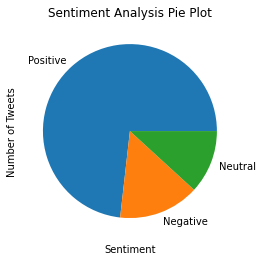

In [83]:
df["vader_prediction"].value_counts().plot(kind='pie')
plt.title("Sentiment Analysis Pie Plot")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

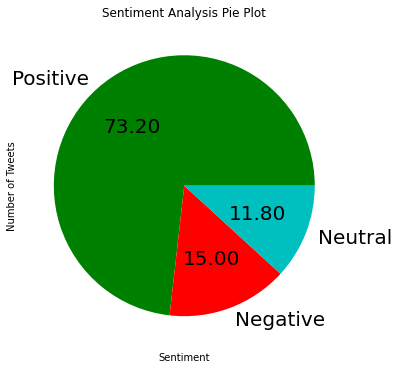

In [84]:

df["vader_prediction"].value_counts().plot(kind='pie',colors=["g", "r", "c"],
    autopct="%.2f",
    fontsize=20,
    figsize=(6, 6),)
plt.title("Sentiment Analysis Pie Plot")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

In [85]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(df['Polarity'], df['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(df['Polarity'], df['vader_prediction']))

Accuracy: 0.992

              precision    recall  f1-score   support

    Negative       1.00      0.97      0.98       155
     Neutral       0.93      1.00      0.96       110
    Positive       1.00      1.00      1.00       735

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.99      0.99      0.99      1000

